# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Internship\\Flight_price_prediction\\ticket_price.csv')
df.head()

,Airline,Source,Destination,Dep_Time,Arr_Time,No_of_stops,Duration,Price,Date
0,Air Asia,New Delhi,Mumbai,19:00,00:35\n+ 1 day,1 Stop,5h 35m,"2,409",15-03-2022
1,Air Asia,New Delhi,Mumbai,08:20,14:10,1 Stop,5h 50m,"2,409",15-03-2022
2,Air Asia,New Delhi,Mumbai,20:00,02:25\n+ 1 day,1 Stop,6h 25m,"2,409",15-03-2022
3,Air Asia,New Delhi,Mumbai,20:45,07:15\n+ 1 day,1 Stop,10h 30m,"2,409",15-03-2022
4,Air Asia,New Delhi,Mumbai,09:35,20:35,1 Stop,11h 00m,"2,409",15-03-2022


## EDA

In [3]:
df.shape

(1525, 9)

In [4]:
df.dtypes

Airline        object
Source         object
Destination    object
Dep_Time       object
Arr_Time       object
No_of_stops    object
Duration       object
Price          object
Date           object
dtype: object

In [5]:
df['Airline'].value_counts()

Air India    402
IndiGo       370
Vistara      345
Go First     164
Air Asia     130
SpiceJet     114
Name: Airline, dtype: int64

In [6]:
df['Destination'].value_counts()

Bangalore    336
Chennai      331
Kolkata      310
Mumbai       302
Hyderabad    246
Name: Destination, dtype: int64

In [7]:
df['No_of_stops'].value_counts()

1 Stop       1076
Non Stop      319
2 Stop(s)     123
3 Stop(s)       7
Name: No_of_stops, dtype: int64

In [8]:
### Replacing number of stops with its corrosponding integer number.

df.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2, "3 Stop(s)":3}, inplace = True)

In [9]:
### Extracting date, month and year seperately.

df['date']=df['Date'].str.split('-').str[0]
df['Month']=df['Date'].str.split('-').str[1]
df['Year']=df['Date'].str.split('-').str[2]

In [10]:
df.head()

,Airline,Source,Destination,Dep_Time,Arr_Time,No_of_stops,Duration,Price,Date,date,Month,Year
0,Air Asia,New Delhi,Mumbai,19:00,00:35\n+ 1 day,1,5h 35m,"2,409",15-03-2022,15,03,2022
1,Air Asia,New Delhi,Mumbai,08:20,14:10,1,5h 50m,"2,409",15-03-2022,15,03,2022
2,Air Asia,New Delhi,Mumbai,20:00,02:25\n+ 1 day,1,6h 25m,"2,409",15-03-2022,15,03,2022
3,Air Asia,New Delhi,Mumbai,20:45,07:15\n+ 1 day,1,10h 30m,"2,409",15-03-2022,15,03,2022
4,Air Asia,New Delhi,Mumbai,09:35,20:35,1,11h 00m,"2,409",15-03-2022,15,03,2022


In [11]:
df['Month'].value_counts()

03    1525
Name: Month, dtype: int64

In [12]:
# Only March month is present, so we can delete the column.
df.drop(['Month'],axis=1,inplace=True)

In [13]:
df['date'].value_counts()

15    777
22    748
Name: date, dtype: int64

In [14]:
df['Year'].value_counts()

2022    1525
Name: Year, dtype: int64

In [15]:
# Only 2022 year is present, so we can delete the column.
df.drop(['Year'],axis=1,inplace=True)

In [16]:
df.drop(['Date'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Dep_Time       0
Arr_Time       0
No_of_stops    0
Duration       0
Price          0
date           0
dtype: int64

In [18]:
# We can delete Arrival Column, because Departure time and Duration gives the same information

df.drop(['Arr_Time'],axis=1,inplace=True)

### We can divide the Departure timings into 4 quarters like Morning, Afternoon and Evening, Night and Mid Night.

In [19]:
df['Dep_Time']=df['Dep_Time'].str.split(':').str[0]

In [20]:
df['Dep_Time']=df['Dep_Time'].astype(int)

In [21]:
for i in df.index:
    if df['Dep_Time'][i]>=0 and df['Dep_Time'][i]<6:
        df['Dep_Time'][i]='Mid Night'
    elif df['Dep_Time'][i]>=6 and df['Dep_Time'][i]<12:
        df['Dep_Time'][i]='Morning'
    elif df['Dep_Time'][i]>=12 and df['Dep_Time'][i]<18:
        df['Dep_Time'][i]='Afternoon & Evening'
    else:
        df['Dep_Time'][i]='Night'

In [22]:
df.head()

,Airline,Source,Destination,Dep_Time,No_of_stops,Duration,Price,date
0,Air Asia,New Delhi,Mumbai,Night,1,5h 35m,"2,409",15
1,Air Asia,New Delhi,Mumbai,Morning,1,5h 50m,"2,409",15
2,Air Asia,New Delhi,Mumbai,Night,1,6h 25m,"2,409",15
3,Air Asia,New Delhi,Mumbai,Night,1,10h 30m,"2,409",15
4,Air Asia,New Delhi,Mumbai,Morning,1,11h 00m,"2,409",15


In [23]:
### The duration is in Hours and Minutes, We can convert them into Hours.

df['Duration']=df['Duration'].str.split(' ').str[0]
df.head()

,Airline,Source,Destination,Dep_Time,No_of_stops,Duration,Price,date
0,Air Asia,New Delhi,Mumbai,Night,1,5h,"2,409",15
1,Air Asia,New Delhi,Mumbai,Morning,1,5h,"2,409",15
2,Air Asia,New Delhi,Mumbai,Night,1,6h,"2,409",15
3,Air Asia,New Delhi,Mumbai,Night,1,10h,"2,409",15
4,Air Asia,New Delhi,Mumbai,Morning,1,11h,"2,409",15


In [24]:
### We should convert Duration time into integer value.

df['Duration']=df['Duration'].str.split('h').str[0]
df['Duration']=df['Duration'].astype(int)

In [25]:
df.head()

,Airline,Source,Destination,Dep_Time,No_of_stops,Duration,Price,date
0,Air Asia,New Delhi,Mumbai,Night,1,5,"2,409",15
1,Air Asia,New Delhi,Mumbai,Morning,1,5,"2,409",15
2,Air Asia,New Delhi,Mumbai,Night,1,6,"2,409",15
3,Air Asia,New Delhi,Mumbai,Night,1,10,"2,409",15
4,Air Asia,New Delhi,Mumbai,Morning,1,11,"2,409",15


In [26]:
### Dropping source column, since all flights start from new delhi.

df.drop(['Source'],axis=1,inplace=True)

In [27]:
### Removing ',' in the price column.

df['Price']=df['Price'].str.replace(',','')

In [28]:
df.head()

,Airline,Destination,Dep_Time,No_of_stops,Duration,Price,date
0,Air Asia,Mumbai,Night,1,5,2409,15
1,Air Asia,Mumbai,Morning,1,5,2409,15
2,Air Asia,Mumbai,Night,1,6,2409,15
3,Air Asia,Mumbai,Night,1,10,2409,15
4,Air Asia,Mumbai,Morning,1,11,2409,15


In [29]:
df['Price']=df['Price'].astype(int)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

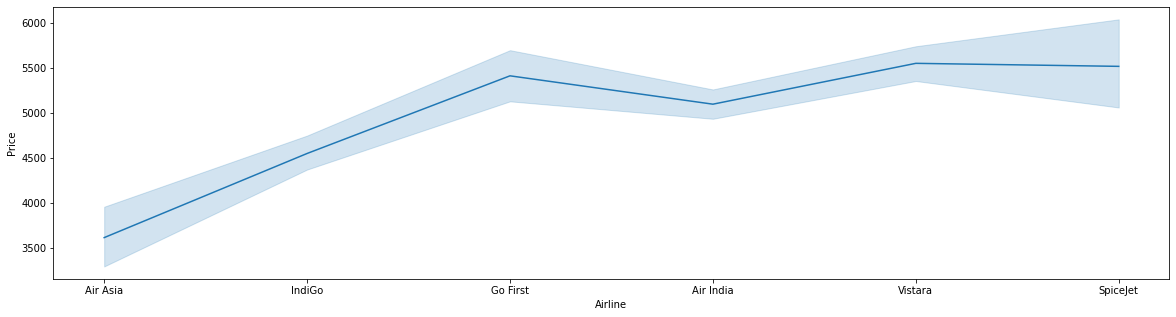

In [30]:
plt.figure(figsize=(20,5))
sns.lineplot(df['Airline'],df['Price'])

### Go First and Vistara are the costliest airlines.

<AxesSubplot:xlabel='Airline', ylabel='count'>

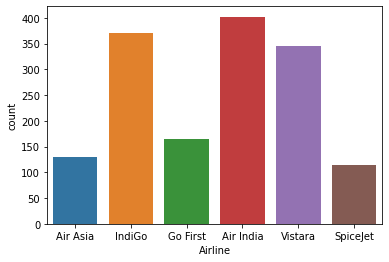

In [31]:
sns.countplot(df['Airline'])

### Number of Air India and IndiGo flights are more.

<AxesSubplot:xlabel='date', ylabel='Price'>

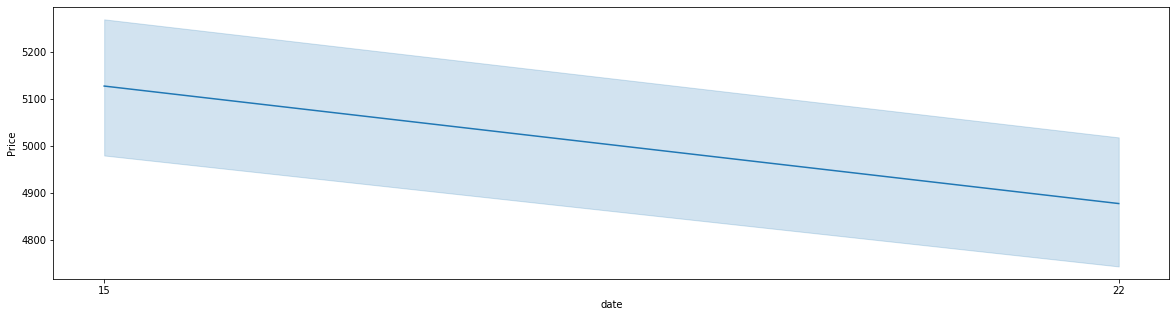

In [32]:
plt.figure(figsize=(20,5))
sns.lineplot(df['date'],df['Price'])

### The flights on March 22nd are cheaper than rates on March 15th

<AxesSubplot:xlabel='Price', ylabel='Count'>

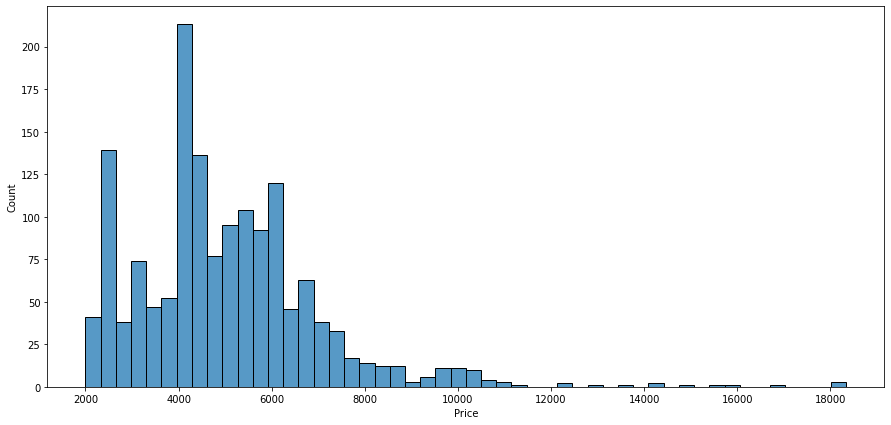

In [33]:
plt.figure(figsize=(15,7))
sns.histplot(df['Price'],bins=50)

### Most of the Ticket prices are in the range of 4000 - 6000.

<AxesSubplot:xlabel='Destination', ylabel='count'>

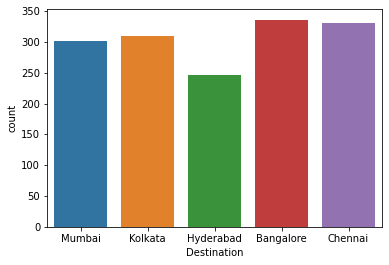

In [34]:
sns.countplot(df['Destination'])

### There are more flights to Bangalore and Chennai from Delhi.

<AxesSubplot:xlabel='Dep_Time', ylabel='count'>

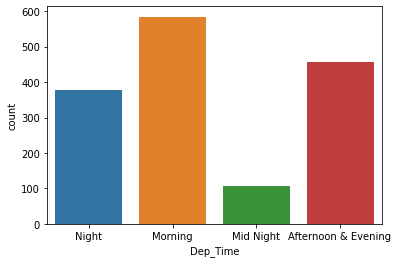

In [35]:
sns.countplot(df['Dep_Time'])

### There are more flights in Day Time.

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

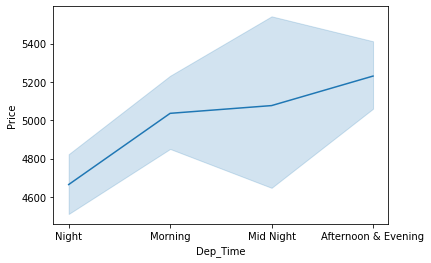

In [36]:
sns.lineplot(df['Dep_Time'],df['Price'])

### The flight ticket prices at night time are cheaper. 

## Outliers Removal

In [37]:
t=['Price']
for i in t:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    outliers = df[(df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR)]
    
    fare_mean = df[i].mean()
    fare_std = df[i].std()
    low= fare_mean -(3 * fare_std)
    high= fare_mean + (3 * fare_std)
    fare_outliers = df[(df[i] < low) | (df[i] > high)]
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i]))

### Instead of eliminating the outliers, we have replaced the outliers higher than the upper whisker by the value of upper whisker and the outliers lower than the lower whisker by the value of lower whisker

## Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
li=['Airline','Destination','Dep_Time','date']
for i in li:
    df[i]=lab.fit_transform(df[i].values.reshape(-1,1))

In [39]:
df.head()

,Airline,Destination,Dep_Time,No_of_stops,Duration,Price,date
0,0,4,3,1,5,2409.0,0
1,0,4,2,1,5,2409.0,0
2,0,4,3,1,6,2409.0,0
3,0,4,3,1,10,2409.0,0
4,0,4,2,1,11,2409.0,0


<AxesSubplot:>

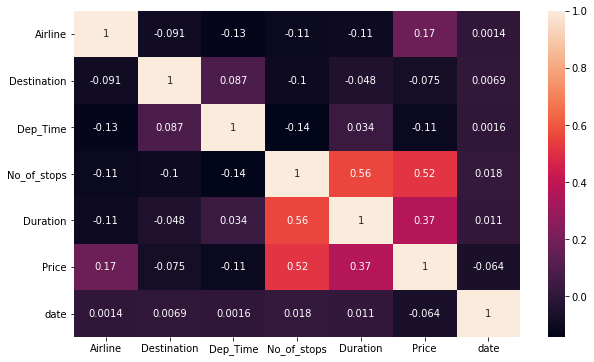

In [40]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [41]:
df.drop(['Duration'],axis=1,inplace=True)

### Price is mostly depends on Airline, Number of stops and Duration.

In [42]:
x=df.drop(['Price'],axis=1)
y=df['Price']

## Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Airline,Destination,Dep_Time,No_of_stops,date
0,-1.582288,1.423674,1.226519,0.220121,-0.981161
1,-1.582288,1.423674,0.362175,0.220121,-0.981161
2,-1.582288,1.423674,1.226519,0.220121,-0.981161
3,-1.582288,1.423674,1.226519,0.220121,-0.981161
4,-1.582288,1.423674,0.362175,0.220121,-0.981161


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.042974,Airline
1,1.025100,Destination
2,1.046835,Dep_Time
3,1.048567,No_of_stops
4,1.000421,date


### Here for all the columns, VIF score is less than 5. Therefore, Multi-Collinearity is not there.

## Choosing Random State Value

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.42636336673455666 ran state= 113


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=maxran)

## Model Selection with Hyper Parameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'fit_intercept': True, 'random_state': 4, 'selection': 'random'}


In [49]:
ls = Lasso(alpha=10,fit_intercept=True,random_state=4,selection='random')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
a1=r2*100
a1

42.491557585151476

### Ridge Regression

In [50]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'max_iter': 1, 'normalize': True}


In [51]:
rd = Ridge(alpha=0.01,copy_X=True,max_iter=1,normalize=True)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
a2=r2*100
a2

42.57419998270914

### Decision Tree Regression

In [52]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],
            'max_depth':list(range(1,15,2)),'max_features':['auto', 'sqrt', 'log2'],
           'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 50, 'splitter': 'best'}


In [53]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=7,max_features='auto',splitter='best',max_leaf_nodes=50)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
a3=r2*100
a3

60.3373062437073

## Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
cv1=(cross_val_score(ls,x,y,cv=5).mean())*100
cv2=(cross_val_score(rd,x,y,cv=5).mean())*100
cv3=(cross_val_score(dtr,x,y,cv=5).mean())*100

In [61]:
print(cv1,cv2,cv3)

4.514137432067476 3.6528600171527903 -4.935478523029533


In [62]:
print((a1-cv1),(a2-cv2),(a3-cv3))

37.977420153084 38.92133996555635 65.27278476673683


### We can choose Decision Tree Regressor as our model, since its r2 score and cv_score has least difference.

In [63]:
fin_las = Lasso(alpha=10,fit_intercept=True,random_state=4,selection='random')
fin_las.fit(x_train,y_train)
pred=fin_las.predict(x_test)
r2=r2_score(y_test,pred)
fin_r2=r2*100
fin_r2

42.491557585151476

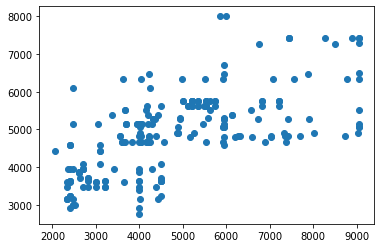

In [64]:
## checking predicted y and labeled y using a scatter plot.

plt.scatter(y_test,pred)

In [66]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 1109.8694733742218
MSE: 1920809.9743112088
RMSE: 1385.9328895409074
